In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [57]:
class SIR_Generator():
    
    def __init__(self,loc=0,scale=1,df=1,ls_values=[], n=1,distribution='exponencial'):
        self.loc= loc
        self.scale= scale
        self.df= df
        self.ls_values= ls_values
        self.distribution= distribution
        self.n= n
        self.var={"chi": stats.chi(df=self.loc),
                  "exponencial":stats.expon(loc=self.loc, scale=self.scale),
                  "lognormal": stats.lognorm(s= self.loc),
                  "normal": stats.norm(loc= self.loc, scale=self.scale)
                  
                 }
    def set_params(self,loc,scale):
        auxL= self.loc
        auxS= self.scale
        self.loc=loc
        self.scale=scale
        return auxL,auxS
    
    def calculateValues(self,loc,scale,dist):
        X=self.var[self.distribution]
        auxL,auxS=self.set_params(loc,scale)
        print(self.loc,self.scale)
        Y=self.var[dist]
        print(f"Y={Y.dist},{Y.kwds}\nX={X.dist}, {X.kwds}")
        x= X.rvs(size=self.n)
        W=Y.pdf(x)/X.pdf(x)
        W/=W.sum()
        values= np.random.choice(x,size=self.n,replace=True,p=W)
        _,_= self.set_params(auxL,auxS)
        return values
    
    def getNorm(self,loc,scale):
        values= self.calculateValues(0,1,"normal")
        ls=[]
        for val in values:
            u= np.random.uniform(size=1)
            if(u<=.5):
                ls.append(val)
            else:
                ls.append(-val)
        self.ls_values= loc+ np.array(ls)*(scale)
        
        
    def getLognorm(self,loc,scale):
        values=self.calculateValues(loc,scale,"lognormal")
        self.ls_values=values
        
    def getChi(self, df):
        values=self.calculateValues(df,1,"chi")
        self.ls_values=values

In [54]:
generador= SIR_Generator(loc=0,scale=1,n=100000)

In [55]:
generador.getLognorm(loc=.5,scale=1)

0.5 1
Y=<scipy.stats._continuous_distns.lognorm_gen object at 0x7fc1f3a65cf0>,{'s': 0}
X=<scipy.stats._continuous_distns.expon_gen object at 0x7fc1f39f69b0>, {'loc': 0, 'scale': 1}


ValueError: probabilities contain NaN

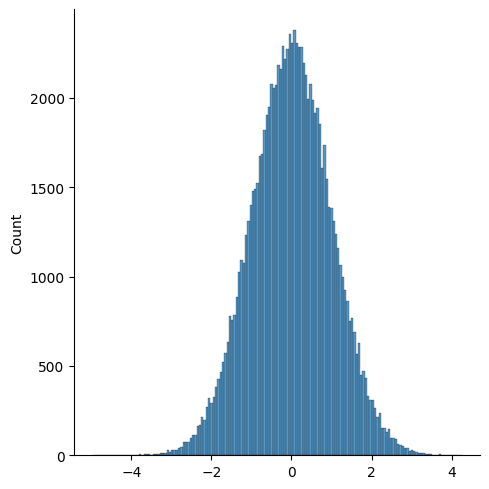

In [29]:
sns.displot(generador.ls_values)

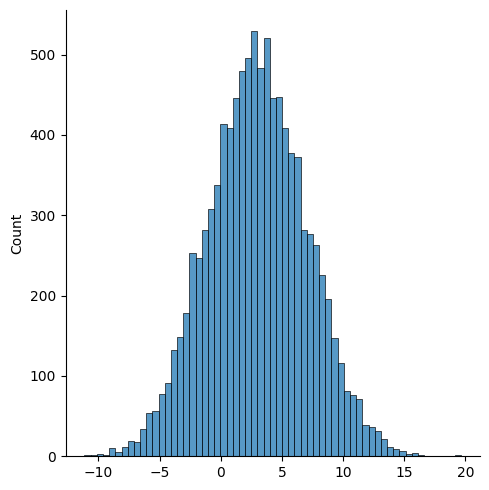

In [88]:
sns.displot(stats.norm.rvs(loc=3,scale=4,size=10000))

In [111]:
X=stats.expon.rvs(scale=1,size=1000)

In [118]:
X=stats.expon(loc=0, scale=1)

In [119]:
x=X.rvs(1000)

In [162]:
Y.kwds

{'s': 0.5}

In [163]:
Y.dist

In [161]:
Y=stats.lognorm(s= .5)

In [147]:
(Y.pdf(x)/X.pdf(x))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,